In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('company_nps_data.csv',encoding='euc-kr')

In [5]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [6]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
회사ID        99801 non-null int64
연매출액        99801 non-null int64
년도          99801 non-null int64
월           99801 non-null int64
월별_연금보험료    99801 non-null int64
월별_직원수      99801 non-null int64
dtypes: int64(6)
memory usage: 4.6 MB


In [8]:
b = pd.to_datetime(df['년도'].astype(str) + df["월"].astype(str), format='%Y%m')

In [9]:
date = pd.DataFrame(b)

In [10]:
# date.rename(columns={0:"date"}, inplace=True)

In [11]:
date.head()

,0
0,2018-07-01
1,2018-03-01
2,2018-07-01
3,2015-11-01
4,2018-10-01


In [12]:
df_2 = df.join(date)

In [13]:
# 컬럼명 변경
df_2.rename(columns={0:"날짜"}, inplace=True)

In [14]:
df_2["연매출액"].max()

11328779396

In [15]:
df_2[df_2["연매출액"] == 11328779396]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
6449,63,11328779396,2018,6,401083100,1011,2018-06-01
23302,63,11328779396,2018,7,418169080,1009,2018-07-01
23648,63,11328779396,2018,10,414503020,996,2018-10-01
28110,63,11328779396,2018,5,400339640,1002,2018-05-01
33039,63,11328779396,2018,1,403119840,1006,2018-01-01
52606,63,11328779396,2018,8,418292620,1011,2018-08-01
53569,63,11328779396,2018,12,419953960,1014,2018-12-01
74251,63,11328779396,2018,2,406770960,1018,2018-02-01
79358,63,11328779396,2018,9,416186660,999,2018-09-01
80770,63,11328779396,2018,4,404211800,1012,2018-04-01


In [16]:
df_2 = df_2.sort_values(by=["회사ID", "날짜"])

In [17]:
a = df_2[df_2["회사ID"] == 63]

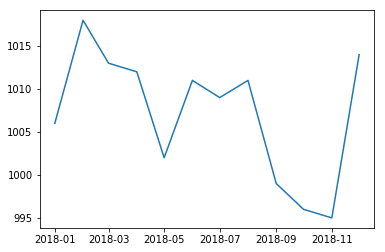

In [20]:
plt.plot(a["날짜"], a["월별_직원수"])

In [21]:
df_2["월별_연금보험료"].max()

978067260

In [22]:
df_2[df_2["월별_연금보험료"] == 978067260]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
37400,227414,4933525226,2018,8,978067260,2499,2018-08-01


In [23]:
b = df_2[df_2['회사ID'] == 227414]

In [24]:
df_2.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
33039,63,11328779396,2018,1,403119840,1006,2018-01-01
74251,63,11328779396,2018,2,406770960,1018,2018-02-01
80947,63,11328779396,2018,3,404826240,1013,2018-03-01
80770,63,11328779396,2018,4,404211800,1012,2018-04-01
28110,63,11328779396,2018,5,400339640,1002,2018-05-01


In [25]:
# pct = df_2["월별_직원수"].pct_change().round(2)

In [26]:
# df_2.insert(len(df_2.columns), "월별_직원수_변동률", pct)

In [27]:
a = df_2[df_2['회사ID'] == 63]
a

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
33039,63,11328779396,2018,1,403119840,1006,2018-01-01
74251,63,11328779396,2018,2,406770960,1018,2018-02-01
80947,63,11328779396,2018,3,404826240,1013,2018-03-01
80770,63,11328779396,2018,4,404211800,1012,2018-04-01
28110,63,11328779396,2018,5,400339640,1002,2018-05-01
6449,63,11328779396,2018,6,401083100,1011,2018-06-01
23302,63,11328779396,2018,7,418169080,1009,2018-07-01
52606,63,11328779396,2018,8,418292620,1011,2018-08-01
79358,63,11328779396,2018,9,416186660,999,2018-09-01
23648,63,11328779396,2018,10,414503020,996,2018-10-01


In [28]:
a['월별_직원수'].pct_change().round(2)

33039     NaN
74251    0.01
80947   -0.00
80770   -0.00
28110   -0.01
6449     0.01
23302   -0.00
52606    0.00
79358   -0.01
23648   -0.00
98243   -0.00
53569    0.02
Name: 월별_직원수, dtype: float64

In [29]:
unique = df_2["회사ID"].unique()

In [30]:
for i in unique:
    df_2[df_2["회사ID"] == i]